# Loading simulations and visualizing data from standard output

## Verification of Taylor-Green vortex case

See [`snek5000-tgv`](https://github.com/exabl/snek5000/tree/main/docs/examples/snek5000-tgv) for the implementation. The simulation was executed as follows:

```py
from snek5000_tgv.solver import Simul


params = Simul.create_default_params()
sim = Simul(params)
sim.make.exec()
```

Here we load and process the output.

In [1]:
from snek5000 import load

sim = load("tgv_run_8x8x8_V1pix1pix1pi_2021-11-12_10-27-42")

[11/12/21 15:10:14] INFO     Trying to open the path relative to $FLUIDSIM_PATH  ]8;id=677247;file:///home/avmo/src/snek5000/snek5000/src/snek5000/util/files.py\files.py]8;;\:126

                    WARNING  Missing a configuration file describing compilers    ]8;id=122146;file:///home/avmo/src/snek5000/snek5000/src/snek5000/output/base.py\base.py]8;;\:209
                             and flags. Create one at either of the following                
                             paths to avoid future warnings:                                 
                             /home/avmo/.config/snek5000/archmage.yml                        
                             /home/avmo/src/snek5000/snek5000/docs/examples/snek5            
                             000-tgv/src/snek5000_tgv/etc/archmage.yml

                    INFO     Using default configuration for now:                 ]8;id=585356;file:///home/avmo/src/snek5000/snek5000/src/snek5000/output/base.py\base.py]8;;\:218
                             /home/avmo/src/snek5000/snek5000/src/snek5000/assets            
                             /default_configfile.yml

                    INFO     ******************************************           ]8;id=976021;file:///home/avmo/src/snek5000/snek5000/src/snek5000/output/base.py\base.py]8;;\:634

                    INFO     solver: <class 'snek5000_tgv.output.OutputTGV'>      ]8;id=358971;file:///home/avmo/src/snek5000/snek5000/src/snek5000/output/base.py\base.py]8;;\:635

                    INFO     path_run: /home/avmo/.local/scratch/data/tgv_run_8x8 ]8;id=472679;file:///home/avmo/src/snek5000/snek5000/src/snek5000/output/base.py\base.py]8;;\:636
                             x8_V1pix1pix1pi_2021-11-12_10-27-42

                    INFO     ******************************************           ]8;id=725635;file:///home/avmo/src/snek5000/snek5000/src/snek5000/output/base.py\base.py]8;;\:637

sim:                <class 'snek5000_tgv.solver.SimulTGV'>
sim.output:         <class 'snek5000_tgv.output.OutputTGV'>


## Visualize raw data via ``sim.output.print_stdout``

In subroutine `userchk` of `tgv.usr.f`, the time stamp, kinetic energy and enstrophy are output into standard output, with a keyword `monitor` at the end of the line. We can use regular expressions to extract these lines. If you are new to regular expressions, this website can help you <https://regex101.com/>.

In [2]:
import re

monitor = re.findall('(.*)monitor$', sim.output.print_stdout.text, re.MULTILINE)
monitor

[11/12/21 15:10:22] INFO     Searching for a log file...                   ]8;id=787945;file:///home/avmo/src/snek5000/snek5000/src/snek5000/output/print_stdout.py\print_stdout.py]8;;\:29

['   0.0000E+00   1.2500E-01   3.7500E-01 ',
 '   5.0000E-01   1.2476E-01   3.8418E-01 ',
 '   1.0000E+00   1.2451E-01   4.1504E-01 ',
 '   1.5000E+00   1.2423E-01   4.7292E-01 ',
 '   2.0000E+00   1.2391E-01   5.6602E-01 ',
 '   2.5000E+00   1.2352E-01   7.0473E-01 ',
 '   3.0000E+00   1.2302E-01   9.0194E-01 ',
 '   3.5000E+00   1.2236E-01   1.1860E+00 ',
 '   4.0000E+00   1.2143E-01   1.6307E+00 ',
 '   4.5000E+00   1.2001E-01   2.3444E+00 ',
 '   5.0000E+00   1.1776E-01   3.2496E+00 ',
 '   5.5000E+00   1.1530E-01   3.9581E+00 ',
 '   6.0000E+00   1.1258E-01   4.6560E+00 ',
 '   6.5000E+00   1.0921E-01   5.6664E+00 ',
 '   7.0000E+00   1.0498E-01   6.6638E+00 ',
 '   7.5000E+00   1.0013E-01   7.5919E+00 ',
 '   8.0000E+00   9.4446E-02   8.3471E+00 ',
 '   8.5000E+00   8.8442E-02   8.6116E+00 ',
 '   9.0000E+00   8.2157E-02   8.8213E+00 ',
 '   9.5000E+00   7.6227E-02   8.2313E+00 ',
 '   1.0000E+01   7.0723E-02   7.8817E+00 ',
 '   1.0500E+01   6.5350E-02   7.7685E+00 ',
 '   1.100

It is also possible to achieve the same using Python's string manipulation and list comprehension:

```py
monitor = [
    line[:-len("monitor")]  # Or in Python >= 3.9, line.removesuffix("monitor")
    for line in sim.output.print_stdout.text.splitlines()
    if line.endswith("monitor")
]
```

In [3]:
import pandas as pd

df = pd.DataFrame(
    ((float(value) for value in line.split()) for line in monitor),
    columns=("time", "energy", "enstrophy")
)
df.head()

,time,energy,enstrophy
0,0.0,0.12500,0.37500
1,0.5,0.12476,0.38418
2,1.0,0.12451,0.41504
3,1.5,0.12423,0.47292
4,2.0,0.12391,0.56602


### Reference data

In [4]:
ref = pd.read_csv(
    "../../../lib/Nek5000/examples/tgv/ref/data",
    sep=" ",
    names=("time", "ref:energy", "ref:dE/dt", "ref:enstrophy"),
    comment="#"
)
ref.head()

,time,ref:energy,ref:dE/dt,ref:enstrophy
0,0.00,0.125000,0.000469,0.375000
1,0.01,0.124995,0.000469,0.374990
2,0.02,0.124991,0.000469,0.374987
3,0.03,0.124986,0.000469,0.374993
4,0.04,0.124981,0.000469,0.375006


### Result

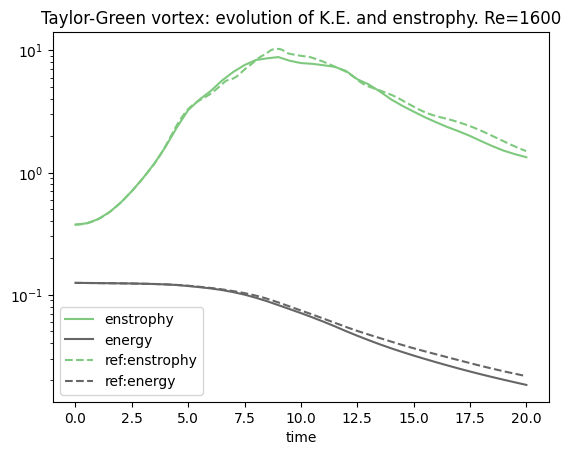

In [5]:
ax = df.plot("time", ["enstrophy", "energy"], logy=True, colormap="Accent")
ref.plot(
    "time",
    ["ref:enstrophy", "ref:energy"],
    ax=ax,
    style="--",
    logy=True,
    colormap="Accent"
)
_ = ax.set(
    title=f"Taylor-Green vortex: evolution of K.E. and enstrophy. Re={-sim.params.nek.velocity.viscosity}"
)